# Part 0.1: Software Versions Used

In [1]:
import numpy as np; np.__version__

'1.9.3'

In [2]:
import scipy; print scipy.__version__

0.16.0


In [3]:
%matplotlib inline

In [4]:
import matplotlib; print matplotlib.__version__

1.4.3


In [76]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
import sklearn; print sklearn.__version__

0.16.1


In [6]:
import IPython; print IPython.__version__

4.0.0


In [7]:
import jupyter; print jupyter.__version__

1.0.0


## WND-CHARM version used

In [8]:
import wndcharm; print wndcharm.__version__

0.9.11


# Part 0.2: Current data

In [9]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier'

In [10]:
ls

CElegans_Cuticle2class.ipynb                      TrainAllTestSubsetN25.txt                         out.fit
CElegans_CuticleClassifier_Scanning_Window.ipynb  generate_sliding_window_features.py               trainingset1/
CuticleTrainedClassifier.fit                      old_analyses/                                     trainingset2/


In [11]:
cd trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


In [12]:
ls

CuticleClassifier_CleanedSamples.fit   moreBody/                              moreGray/                              out.fit.old
CuticleTrainedClassifier_s85_f100.fit  moreCuticle/                           out.fit


In [13]:
from wndcharm.FeatureSpace import FeatureSpace

In [23]:
fs = FeatureSpace.NewFromFitFile( 'CuticleClassifier_CleanedSamples.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE CuticleClassifier_CleanedSamples.fit: <FeatureSpace "CuticleClassifier_CleanedSamples.fit" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>


In [24]:
set( fs._contiguous_ground_truth_labels)

{'moreBody', 'moreCuticle', 'moreGray'}

Combine Gray and body

In [25]:
# Turn moreGray into moreBody
replacement = [ _ if _ != 'moreGray' else 'moreBody' for _ in fs._contiguous_ground_truth_labels]

In [26]:
set(replacement)

{'moreBody', 'moreCuticle'}

In [27]:
# Turn moreCuticle into Cuticle
replacement = [ 'Cuticle' if _ == 'moreCuticle' else _ for _ in replacement ]

In [28]:
set(replacement)

{'Cuticle', 'moreBody'}

In [29]:
# Turn moreBody into NotCuticle
replacement = [ 'NotCuticle' if _ == 'moreBody' else _ for _ in replacement ]

In [30]:
set( replacement)

{'Cuticle', 'NotCuticle'}

In [32]:
fs._contiguous_ground_truth_labels = replacement

In [33]:
fs.SortSamplesByGroundTruth(inplace=True)

<FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted)" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 573, "NotCuticle": 890)>

In [34]:
fs.ToFitFile( 'CuticleClassifier_2Class.fit')

# Standard WND-CHARM analysis

## Section 1.1: Training accuracy ("fit-on-fit")

In [150]:
fs

<FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted)" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 573, "NotCuticle": 890)>

In [35]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [151]:
fs_norm = fs.Normalize( inplace=False )

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted)" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 573, "NotCuticle": 890)>


In [155]:
fw = FisherFeatureWeights.NewFromFeatureSpace( fs_norm).Threshold( )

In [157]:
fw.Print(50)

FisherFeatureWeights (437 features)
Rank	Value	Name
====	=====	====
1	7.096260	Haralick Textures () [9]
2	6.063892	Haralick Textures () [3]
3	5.865134	Haralick Textures () [7]
4	5.102909	Haralick Textures (Edge ()) [7]
5	4.840665	Haralick Textures () [5]
6	4.815063	Haralick Textures (Edge ()) [3]
7	4.435368	Haralick Textures (Edge ()) [9]
8	4.257276	Edge Features () [17]
9	4.185513	Zernike Coefficients (Fourier (Edge ())) [15]
10	3.692942	Fractal Features () [1]
11	3.639851	Pixel Intensity Statistics (Fourier (Edge ())) [2]
12	3.626637	Fractal Features () [0]
13	3.526696	Pixel Intensity Statistics (Wavelet (Edge ())) [2]
14	3.502181	Fractal Features () [2]
15	3.457128	Gini Coefficient (Fourier (Edge ())) [0]
16	3.374848	Pixel Intensity Statistics (Edge ()) [2]
17	3.372454	Pixel Intensity Statistics (Edge ()) [0]
18	3.372454	Pixel Intensity Statistics (Fourier (Edge ())) [4]
19	3.371993	Haralick Textures (Wavelet ()) [3]
20	3.371953	Pixel Intensity Statistics (Wavelet (Edge ())) [0]
21	

In [158]:
reduced_fw

<FisherFeatureWeights n_features=437 feat0="Haralick Textures () [9]" val0=7.09625960899>

In [159]:
reduced_fs = fs_norm.FeatureReduce( reduced_fw, inplace=False )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted) (feature reduced)" n_features=437 n_total_samples=1463 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 573, "NotCuticle": 890)>:'


In [43]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [44]:
table1_1 = FeatureSpaceClassification.NewWND5( reduced_fs, reduced_fs, reduced_fw, quiet=True, name="Table 1-1: Fit on Fit" )

In [45]:
table1_1.Print()

FeatureSpaceClassification "Table 1-1: Fit on Fit" (1463 classifications)
1454/1463 correct = 99.38%


Confusion Matrix:
          	Cuticle	NotCuticle	|	total	acc.
          	-------	----------	|	-----	----
Cuticle	573	0	|	573	100.00%
NotCuticle	9	881	|	890	98.99%

Similarity Matrix:
          	Cuticle	NotCuticle
          	-------	----------
Cuticle	1.00	0.01	
NotCuticle	0.03	1.00	

Average Class Probability Matrix:
          	Cuticle	NotCuticle
          	-------	----------
Cuticle	0.9941	0.0059	
NotCuticle	0.0245	0.9755	



## Section 1.2: Cross-validation WITHOUT LDA

In [46]:
from wndcharm.FeatureSpacePredictionExperiment import FeatureSpaceClassificationExperiment

In [47]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( fs, n_iter=100, random_state=42, quiet=True )

iter	split class acc.
0	0.989583333333
1	0.989583333333
2	1.0
3	0.996527777778
4	0.993055555556
5	0.986111111111
6	1.0
7	1.0
8	1.0
9	1.0
10	1.0
11	0.996527777778
12	0.993055555556
13	0.993055555556
14	0.993055555556
15	0.986111111111
16	0.996527777778
17	0.996527777778
18	1.0
19	1.0
20	1.0
21	0.996527777778
22	0.993055555556
23	0.993055555556
24	0.993055555556
25	0.996527777778
26	0.996527777778
27	0.982638888889
28	1.0
29	0.993055555556
30	0.989583333333
31	1.0
32	0.989583333333
33	0.989583333333
34	0.986111111111
35	0.996527777778
36	0.996527777778
37	0.996527777778
38	1.0
39	1.0
40	0.996527777778
41	0.989583333333
42	0.996527777778
43	0.996527777778
44	0.996527777778
45	0.996527777778
46	1.0
47	0.996527777778
48	0.989583333333
49	0.986111111111
50	0.993055555556
51	0.989583333333
52	0.993055555556
53	1.0
54	0.993055555556
55	1.0
56	1.0
57	0.993055555556
58	0.996527777778
59	0.989583333333
60	0.996527777778
61	0.996527777778
62	0.993055555556
63	0.996527777778
64	1.0
65	0.98958333333

In [48]:
exp.Print()

FeatureSpaceClassificationExperiment "CuticleClassifier_CleanedSamples.fit (sorted) (sorted)" (100 iterations)
28659/28800 correct = 99.51 +/- 0.08% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
          	Cuticle	NotCuticle	|	total	acc.
          	-------	----------	|	-----	----
Cuticle	14400	0	|	14400	100.00%
NotCuticle	141	14259	|	14400	99.02%


Similarity Matrix:
          	Cuticle	NotCuticle
          	-------	----------
Cuticle	1.00	0.01	
NotCuticle	0.03	1.00	


Average Class Probability Matrix:
          	Cuticle	NotCuticle
          	-------	----------
Cuticle	0.9931	0.0069	
NotCuticle	0.0260	0.9740	


Feature Weight Analysis (top 20 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	6.798	100	0.215	6.411	7.505	Haralick Textures () [9]
2	5.776	100	0.197	5.308	6.469	Haralick Textures () [3]
3	5.587	100	0.212	5.134	6.400	Haralick Textures () [7]
4	4.929	100	0.188	4.588	5.396	Haralick Textures (Edge ()) [7]
5	4.638	100	0.165	4.317	5.0

## Section 1.3: Num samples classifier saturation grid search

Using top 15% of features by default

In [50]:
params = {}
params['feature_space'] = fs
params['quiet'] = False
params['n_iter'] = 50
params['param_space'] = 10
params['random_state'] = 42

In [51]:
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [4, 7, 13, 24, 45, 85, 161, 304, 572]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
4	0.89
7	0.94
13	0.93
24	0.99
45	0.98
85	1.0
161	0.99
304	0.99
572	1.0


## Section 1.4: Num features classifier saturation grid search w/ optimized # samples

85 samples/class gets you to 99% classification accuracy

In [171]:
train_set = fs.Split(train_size=300, test_size=0, random_state=42)

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted) (subset) (sorted)" n_features=2919 n_total_samples=600 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 300, "NotCuticle": 300)>


In [53]:
params = {}
params['feature_space'] = train_set
params['quiet'] = False
params['n_iter'] = 50
params['param_space'] = 10
params['random_state'] = 42

In [54]:
FeatureSpaceClassificationExperiment.NumFeaturesGridSearch( **params )

Using num features param space of : [2, 5, 11, 24, 54, 120, 266, 592, 1314, 2919]
FEATURE WEIGHT GRID SEARCH RESULTS:
n features	 figure of merit
2	0.989090909091
5	0.997727272727
11	0.999545454545
24	0.999545454545
54	0.999545454545
120	1.0
266	1.0
592	1.0
1314	1.0
Skipping n_features=2919 and above due to feature reduction error


[(2, 0.9890909090909091),
 (5, 0.9977272727272727),
 (11, 0.9995454545454545),
 (24, 0.9995454545454545),
 (54, 0.9995454545454545),
 (120, 1.0),
 (266, 1.0),
 (592, 1.0),
 (1314, 1.0)]

In [172]:
reduced_fw

<FisherFeatureWeights n_features=437 feat0="Haralick Textures () [9]" val0=7.09625960899>

In [173]:
train_set.FeatureReduce( reduced_fw, inplace=True )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted) (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=600 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 300, "NotCuticle": 300)>:'


<FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted) (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=600 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 300, "NotCuticle": 300)>

# Collage of training set

In [174]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


In [175]:
w = 20
h = 20
num_across = 20
num_down = train_set.num_samples / num_across

In [176]:
num_down

30

In [177]:
collage = np.empty( (h * (num_down), w * (num_across)) )

In [178]:
collage.shape

(600, 400)

In [181]:
row = 0
col = 0
for path in train_set._contiguous_sample_names:
    roi = plt.imread(path)
    #print roi.shape
    y0 = row*h
    y1 = (row+1)*h
    x0 = col*w
    x1 = (col+1)*w
    try:
        collage[ y0:y1, x0:x1 ] = roi
    except:
        print 'row', str( row), 'col', str(col), 'x:',x0, 'y:', y0, 'x2',x1, y1 , 'shape', str(roi.shape)
        break
    col+= 1
    if col == num_across:
        row += 1
        col = 0

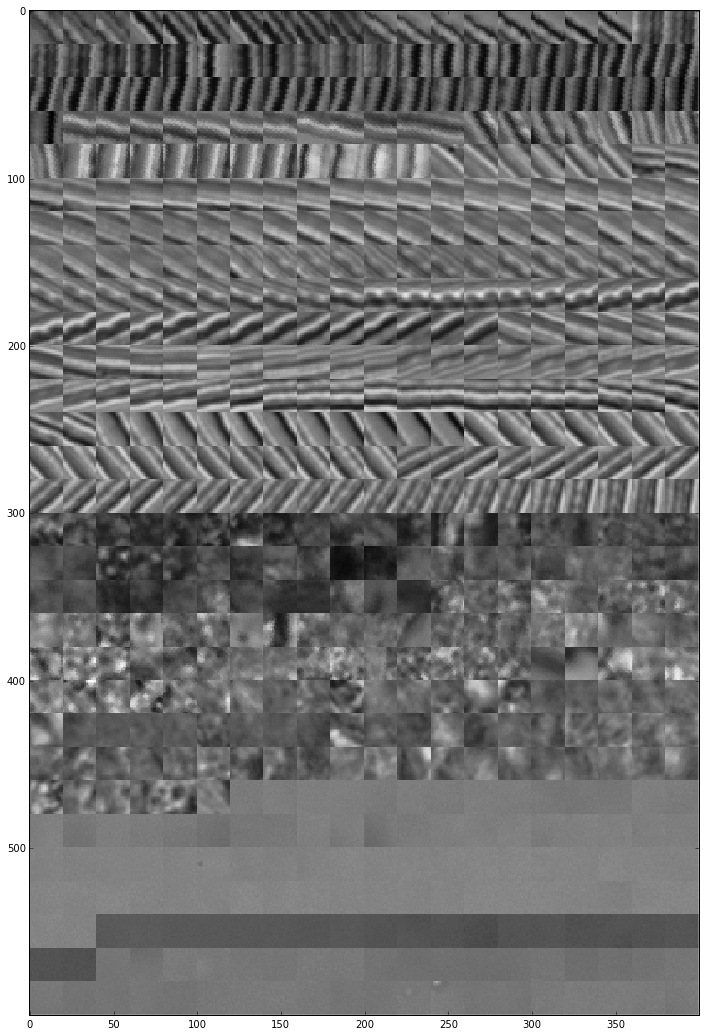

In [201]:
fig, ax = plt.subplots(figsize = (12,18))
ax.imshow( collage, cmap=cm.Greys_r, interpolation='none')


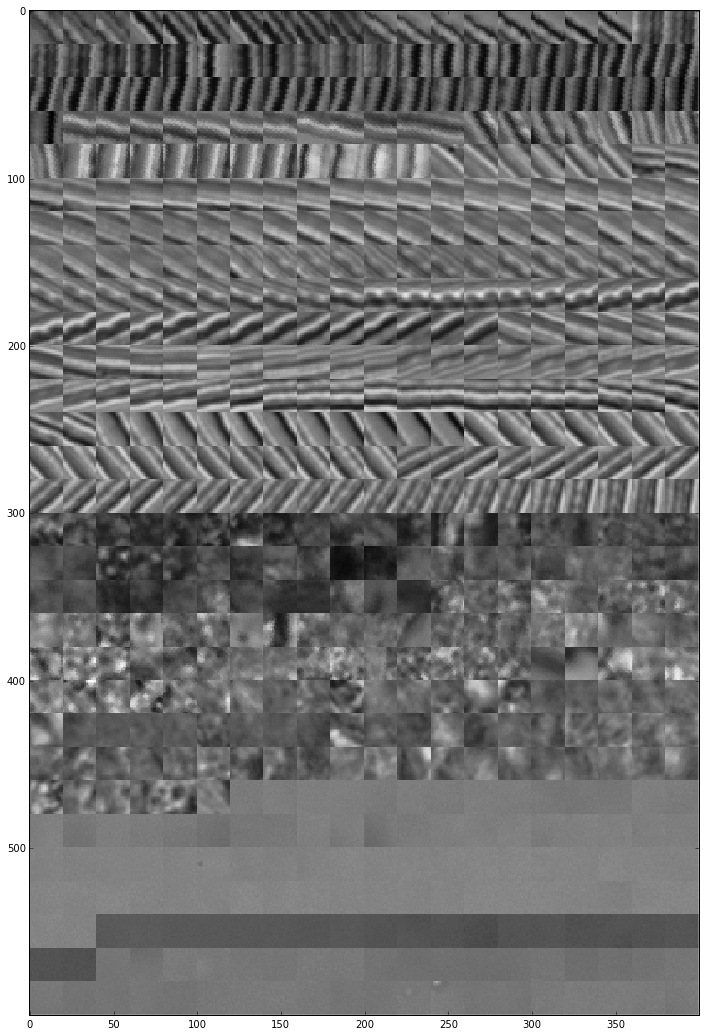

In [202]:
fig

In [203]:
fig.savefig( '/Users/colettace/projects/BII2015_poster/CuticleCollage.pdf')

In [85]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2'

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [84]:
from wndcharm.FeatureVector import SlidingWindow

In [103]:
def ParseSampleSigName( samp_name ):
    base, Binfo, rest = samp_name.split('-', 2)
    #Remove leading 'B'
    Binfo = Binfo[1:]
    x, y, w, h = [ int(_) for _ in Binfo.split('_') ]
    return x,y,w,h

In [185]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44


In [186]:
ls

G9fld44.tif*                                                 G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv
G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit


In [187]:
test_set = FeatureSpace.NewFromFitFile( 'G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit' )

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit: <FeatureSpace "G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit" n_features=2919 n_total_samples=13974 n_samples_per_group=1 n_classes=1 samples_per_class=("UNKNOWN": 13974)>


In [188]:
train_set

<FeatureSpace "CuticleClassifier_CleanedSamples.fit (sorted) (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=600 n_samples_per_group=1 n_classes=2 samples_per_class=("Cuticle": 300, "NotCuticle": 300)>

In [189]:
test_set.FeatureReduce( train_set, inplace=True)

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit (feature reduced)" n_features=437 n_total_samples=13974 n_samples_per_group=1 n_classes=1 samples_per_class=("UNKNOWN": 13974)>:'


<FeatureSpace "G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit (feature reduced)" n_features=437 n_total_samples=13974 n_samples_per_group=1 n_classes=1 samples_per_class=("UNKNOWN": 13974)>

In [190]:
split = FeatureSpaceClassification.NewWND5( train_set, test_set, reduced_fw, quiet=True)

In [191]:
split.Print()

FeatureSpaceClassification "CuticleClassifier_CleanedSamples.fit (sorted) (subset) (sorted) (feature reduced)" (13974 classifications)
0/13974 correct = 0.00%


Confusion Matrix:
       	Cuticle	NotCuticle	|	total	acc.
       	-------	----------	|	-----	----
UNKNOWN	1216	12758	|	13974	0.00%

Can't do similarity matrix if self.test_set.class_names != self.training_set.class_names
Average Class Probability Matrix:
       	Cuticle	NotCuticle
       	-------	----------
UNKNOWN	0.0929	0.9071	



In [138]:
def GetNumRowsCols( fs ):
    columns = set()
    rows = set()
    nudge_horiz = 10
    nudge_vert = 10
    for i, name in enumerate(fs._contiguous_sample_names):
        x,y,w,h = ParseSampleSigName( name )
        col = x / nudge_horiz
        row = y / nudge_vert
        #print "{}: {} x:{} y:{} row:{} col:{}".format( i, name, x, y, row, col)
        columns.add( col )
        rows.add( row )
    #print sorted(rows)
    #print sorted(columns)
    return len( rows ), len( columns )

In [192]:
num_rows, num_cols = GetNumRowsCols( test_set)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]


In [140]:
num_rows, num_cols

(102, 137)

In [147]:
def GenerateMask( exp, num_rows, num_cols ):
    # add buffer:
    cuticle_mask = np.zeros( (num_rows, num_cols) )
    notcuticle_mask = np.zeros( (num_rows, num_cols) )

    if exp.averaged_results:
        classifications = exp.averaged_results
    else:
        classifications = exp.individual_results

    nudge_horiz = 10
    nudge_vert = 10
    for res in classifications:
        cut, notcut = res.marginal_probabilities
        x, y, w, h = ParseSampleSigName( res.source_filepath )
        col = x / nudge_horiz
        row = y / nudge_vert
        cuticle_mask[ row, col ] = cut
        notcuticle_mask[ row, col ] = notcut

    return cuticle_mask, notcuticle_mask

In [193]:
cuticle_mask, notcuticle_mask = GenerateMask( split, num_rows, num_cols )

In [128]:
def CreateGraph( title, tif_path, cuticle_mask, noncuticle_mask ):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, squeeze=True, figsize=(8,15))
    #fig.suptitle( title ,fontsize=20)
    im = plt.imread( tif_path )
    ax1.set_title( tif_path )
    ax1.imshow( im, cmap=cm.Greys_r, interpolation='none')
    ax2.set_title( 'CUTICLE signal')
    ax2.imshow( cuticle_mask, cmap=plt.cm.Blues, interpolation='none')
    ax3.set_title( 'NON-CUTICLE signal')
    ax3.imshow( noncuticle_mask , cmap=plt.cm.Blues, interpolation='none')
    return fig

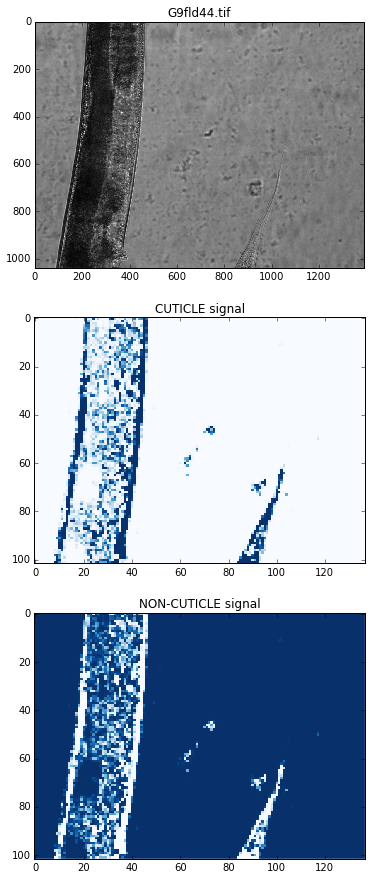

In [194]:
fig = CreateGraph( 'G9fld44.tif', 'G9fld44.tif', cuticle_mask, notcuticle_mask)

In [197]:
fig.savefig('/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44/G9fld44_2ClassScanningWindow_RESULTS.pdf')

In [196]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44'

In [199]:
fig.savefig('/Users/colettace/G9fld44_2ClassScanningWindow_RESULTS.pdf')